### Student Name: Aidan Keeshan
### Student ID: 18200117

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
data = np.genfromtxt('Task4.csv', delimiter=',', names=True)

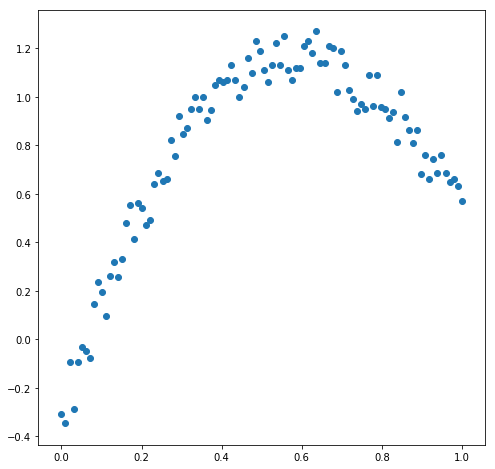

In [2]:
plt.figure(figsize=(8, 8))
plt.scatter(data['X'],data['y'])
plt.show()

In [22]:
def train_test_split(X,y,test_size):
    indexs = np.arange(X.shape[0])
    np.random.shuffle(indexs)
    ind_split = np.int((1-test_size)*indexs.shape[0])
    X = np.array(X)
    y = np.array(y)
    ind_test = indexs[ind_split:]
    ind_train = indexs[:ind_split]  
    return [X[ind_train],X[ind_test],y[ind_train],y[ind_test]]

In [30]:
class lin_reg:
    def fit(self, X, y):
        X = np.c_[np.ones([X.shape[0],1]),X]
        pseudo_inv_matrix = np.linalg.pinv(X)
        weight_matrix = pseudo_inv_matrix.dot(y)
        self.w = weight_matrix
        
    def calculate_error(self,X,y):
        yhat = self.predict(X)
        return (np.power(yhat - y,2).sum()/len(y))

    def predict(self, X):
        X = np.c_[np.ones([X.shape[0],1]),X]
        return np.matmul(X,self.w)
    
    def predict_point(self, X):
        return (self.w[1]*X) + self.w[0]

In [41]:
linreg = lin_reg()
linreg.fit(data['X'],data['y'])
print (linreg.w)
print (linreg.calculate_error(data['X'],data['y']))

[0.3916748 0.7894663]
0.10257856683995759


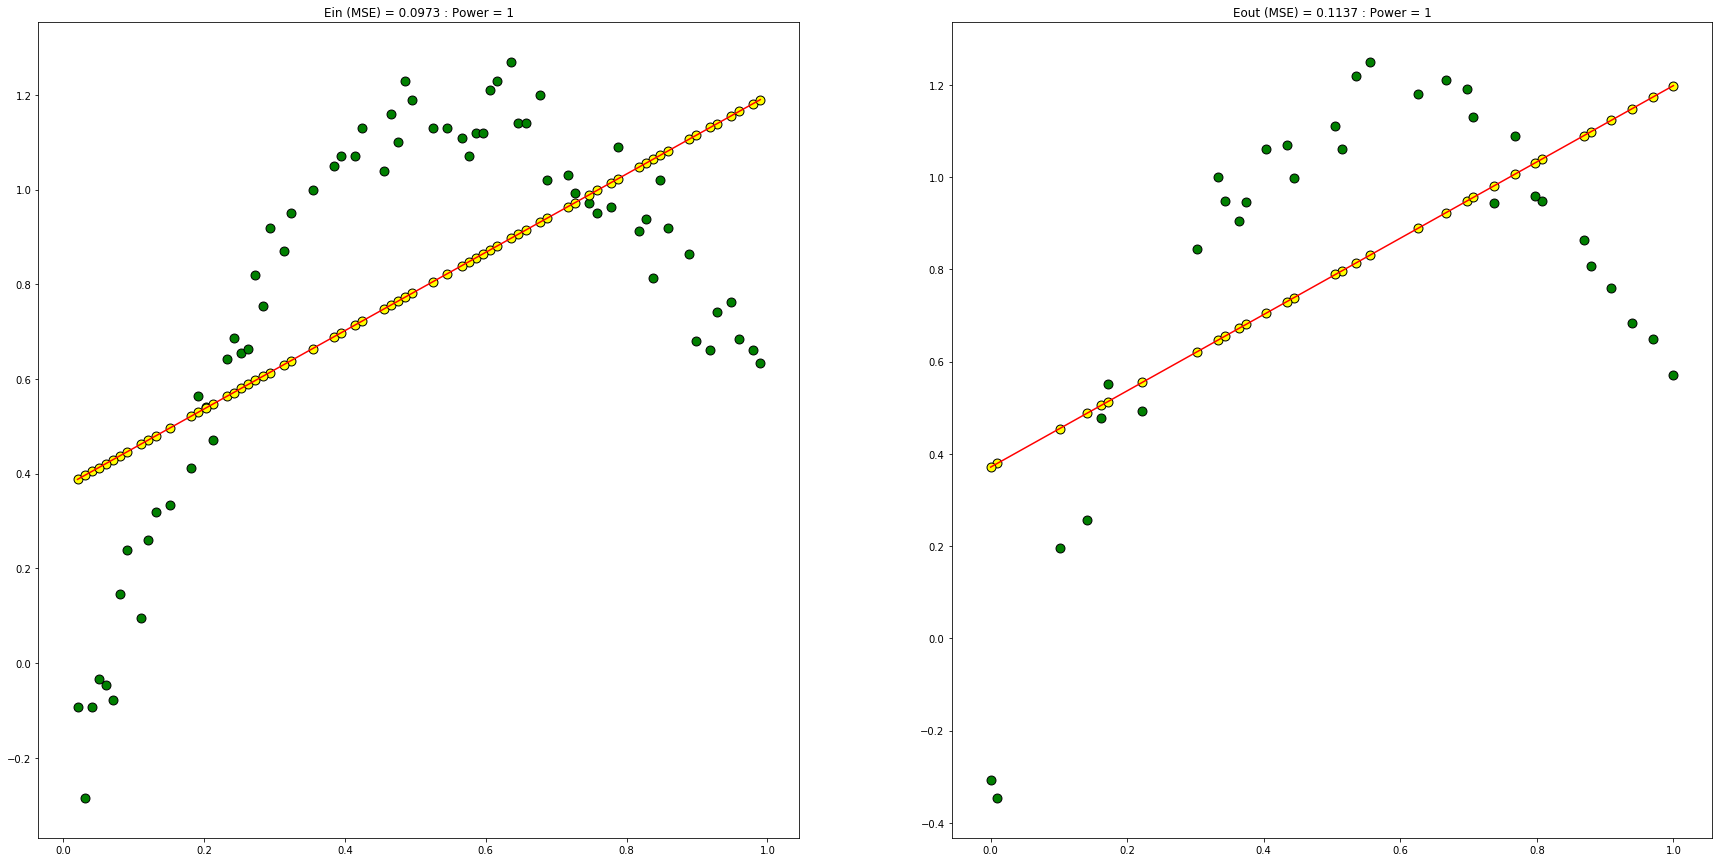

In [131]:
def plot_circle_1d(X,y,linreg,title):
    xs = [X.min(), X.max()]
    ys = [linreg.predict_point(xs[0]),linreg.predict_point(xs[1])]
    _ = plt.plot(xs, ys, color='red')
    _ = plt.scatter(X,y, marker='o',s=80,color='green', edgecolors='black')
    _ = plt.scatter(X,linreg.predict(X), marker='o',s=80,color='yellow', edgecolors='black')
    _ = plt.title(title)
    
def plot_circle_nd(X,y,linreg,title):
    _ = plt.scatter(X[:,0],y, marker='o',s=80,color='green', edgecolors='black')
    _ = plt.scatter(X[:,0],linreg.predict(X), marker='o',s=80,color='yellow', edgecolors='black')
    _ = plt.title(title)

def run_reg(X_in,y_in,power=1):
    X_train, X_test, y_train, y_test = train_test_split(X_in,y_in, test_size=0.33)
    linreg = lin_reg()
    linreg.fit(X_train,y_train)
    
    if X_train.ndim == 1:
        plot_func = plot_circle_1d
    else:
        plot_func = plot_circle_nd
        power = X_train.shape[1]
    f, axs = plt.subplots(1, 2, figsize=(30, 15))
    plt.subplot(1, 2, 1)
    train_error = linreg.calculate_error(X_train,y_train)
    plot_func(X_train,y_train,linreg,"Ein (MSE) = {:.4f} : Power = {}".format(train_error,power))
    plt.subplot(1, 2, 2)
    test_error  = linreg.calculate_error(X_test, y_test)
    plot_func(X_test,y_test,linreg,"Eout (MSE) = {:.4f} : Power = {}".format(test_error,power))
    plt.show()
    
run_reg(data['X'],data['y'])

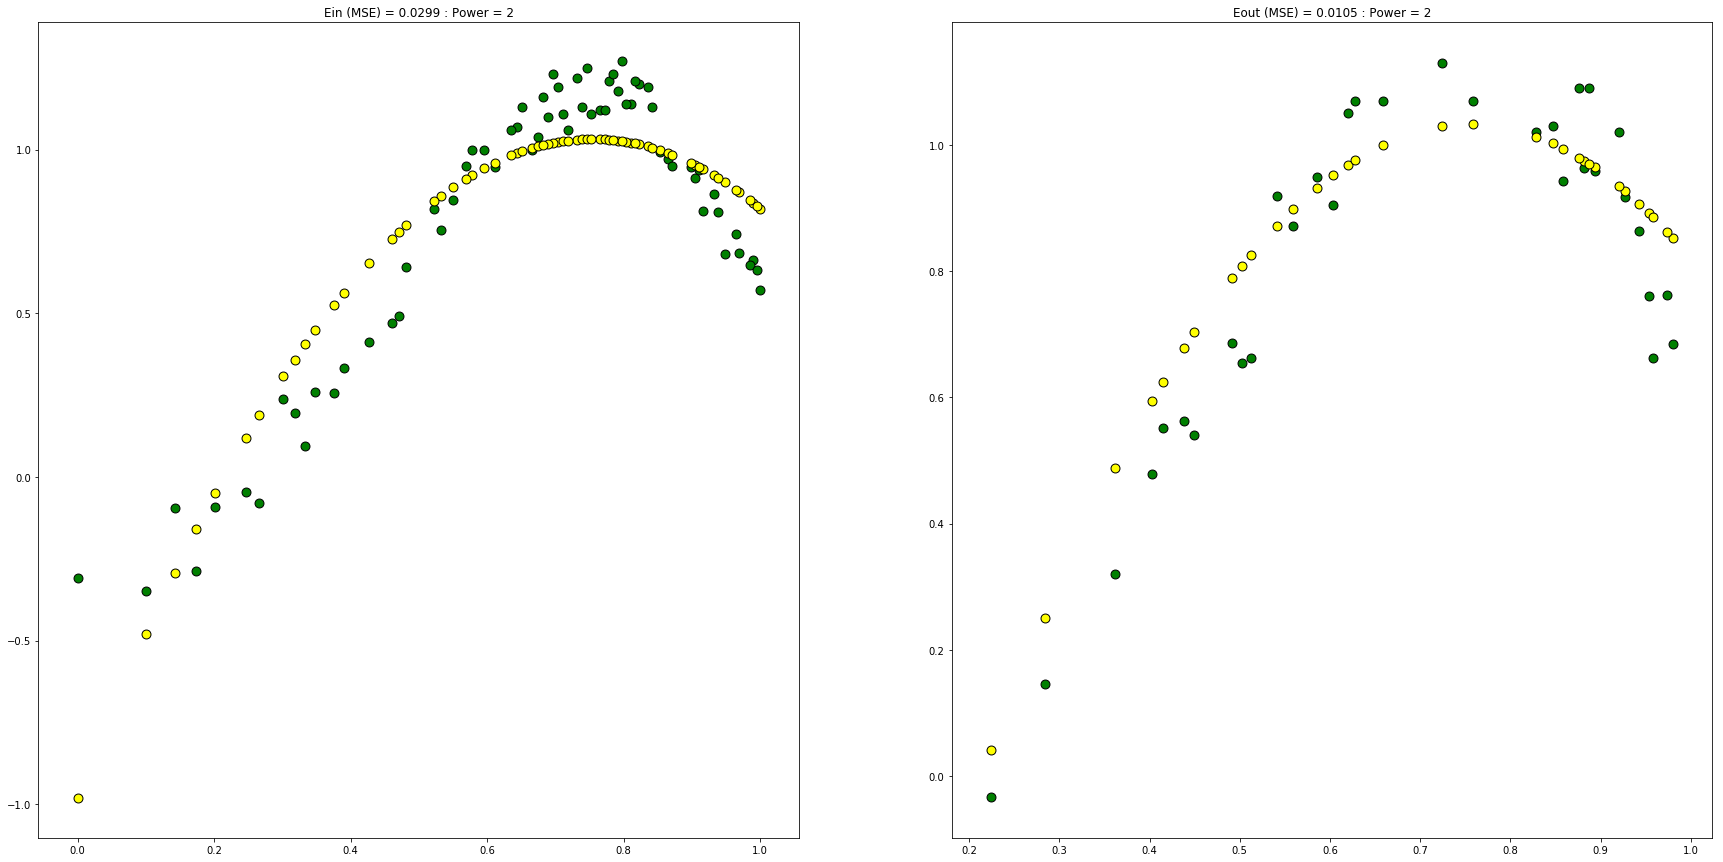

In [103]:
X = np.c_[np.sqrt(data['X']),data['X']]
run_reg(X,data['y'])

In [104]:
n_max = 20
n_stats = []
for n in range(n_max):
    if n == 0:
        X = data['X']
    else:
        X = np.c_[X,np.power(data['X'],n+1)]
    X_train, X_test, y_train, y_test = train_test_split(X,data['y'], test_size=0.33)
    linreg = lin_reg()
    linreg.fit(X_train,y_train)
    n_stats.append([n+1,linreg.calculate_error(X_train,y_train),linreg.calculate_error(X_test, y_test)])

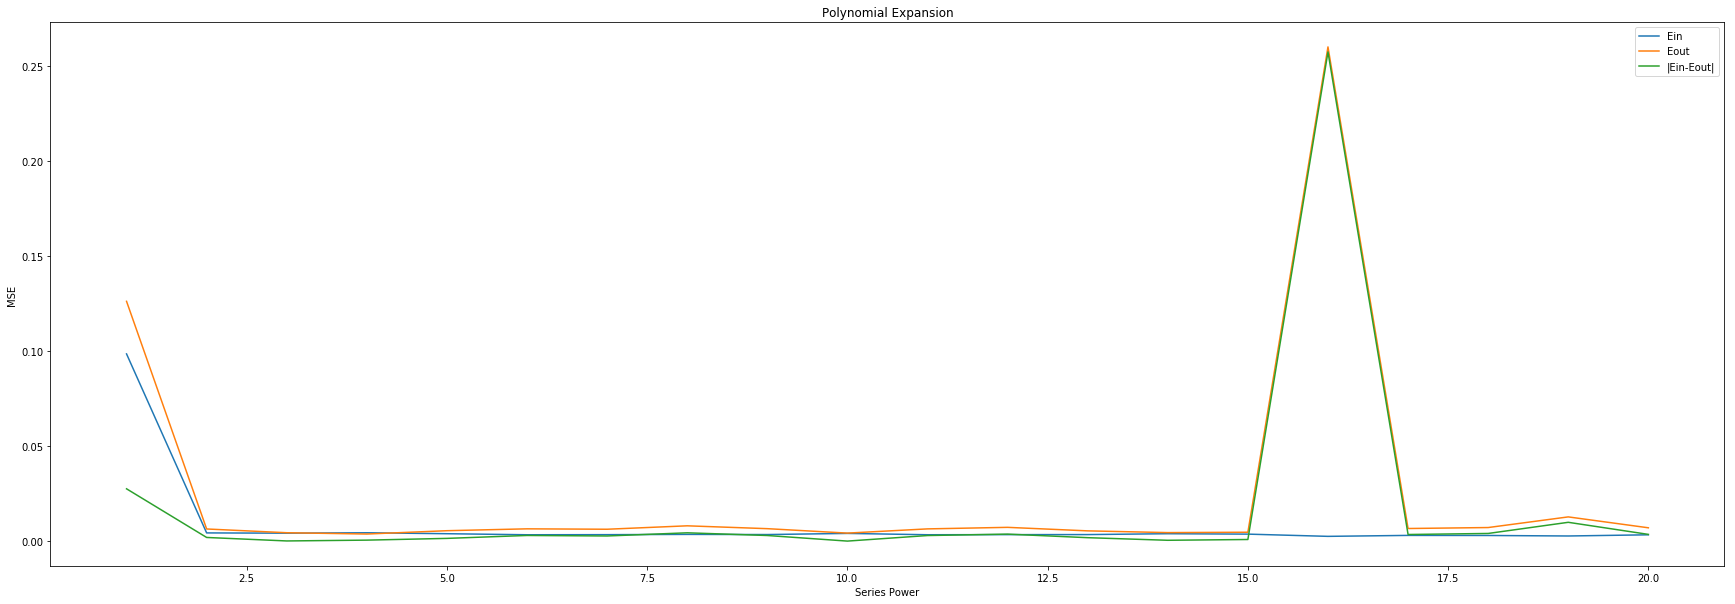

In [145]:
n_stats = np.array(n_stats)
n_stats = np.c_[n_stats,np.abs(n_stats[:,2]-n_stats[:,1])]
n_min_e = n_stats[:,2].argmin()

plt.figure(figsize=(30, 10))
plt.plot(n_stats[:,0],n_stats[:,1],label='Ein')
plt.plot(n_stats[:,0],n_stats[:,2],label='Eout')
plt.plot(n_stats[:,0],n_stats[:,3],label='|Ein-Eout|')
plt.legend()
plt.title("Polynomial Expansion")
plt.xlabel('Series Power')
plt.ylabel('MSE') 
plt.show()

In [146]:
for i in range(len(n_stats)):
    if i == n_min_e:
        print ("\x1b[32mPower:  {}\t\tEin = {:.4f}\t\tEin = {:.4f}\t\t|Ein-Eout| = {:.4f}\x1b[0m".format(n_stats[i][0],n_stats[i][1],n_stats[i][2],n_stats[i][3]))
    else:
        print ("\x1b[31mPower:  {}\t\tEin = {:.4f}\t\tEin = {:.4f}\t\t|Ein-Eout| = {:.4f}\x1b[0m".format(n_stats[i][0],n_stats[i][1],n_stats[i][2],n_stats[i][3]))

Power:  1.0		Ein = 0.0986		Ein = 0.1263		|Ein-Eout| = 0.0277
Power:  2.0		Ein = 0.0045		Ein = 0.0065		|Ein-Eout| = 0.0021
Power:  3.0		Ein = 0.0043		Ein = 0.0046		|Ein-Eout| = 0.0002
Power:  4.0		Ein = 0.0045		Ein = 0.0039		|Ein-Eout| = 0.0007
Power:  5.0		Ein = 0.0040		Ein = 0.0056		|Ein-Eout| = 0.0016
Power:  6.0		Ein = 0.0035		Ein = 0.0066		|Ein-Eout| = 0.0031
Power:  7.0		Ein = 0.0035		Ein = 0.0064		|Ein-Eout| = 0.0029
Power:  8.0		Ein = 0.0037		Ein = 0.0082		|Ein-Eout| = 0.0045
Power:  9.0		Ein = 0.0036		Ein = 0.0067		|Ein-Eout| = 0.0031
Power:  10.0		Ein = 0.0042		Ein = 0.0044		|Ein-Eout| = 0.0002
Power:  11.0		Ein = 0.0035		Ein = 0.0066		|Ein-Eout| = 0.0031
Power:  12.0		Ein = 0.0036		Ein = 0.0074		|Ein-Eout| = 0.0038
Power:  13.0		Ein = 0.0036		Ein = 0.0055		|Ein-Eout| = 0.0020
Power:  14.0		Ein = 0.0040		Ein = 0.0046		|Ein-Eout| = 0.0006
Power:  15.0		Ein = 0.0038		Ein = 0.0048		|Ein-Eout| = 0.0010
Power:  16.0		Ein = 0.0026		Ein = 0.2602		|Ein-Eout| = 0.2575
Power:  17.0		Ein

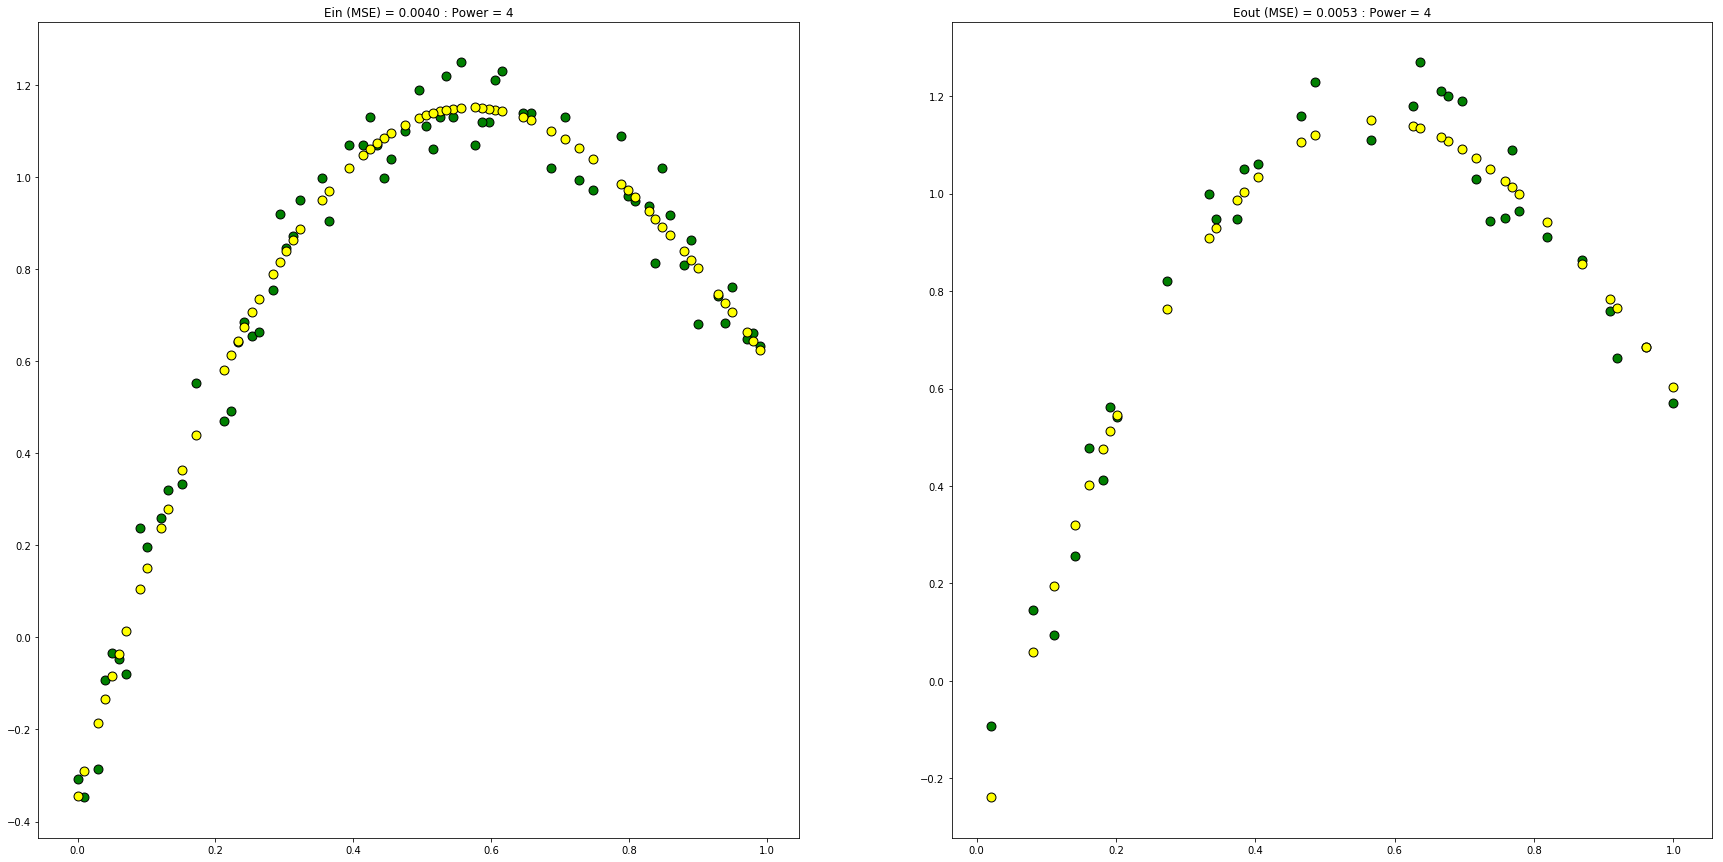

In [147]:
for n in range(n_min_e+1):
    if n == 0:
        X = data['X']
    else:
        X = np.c_[X,np.power(data['X'],n+1)]

run_reg(X,data['y'])

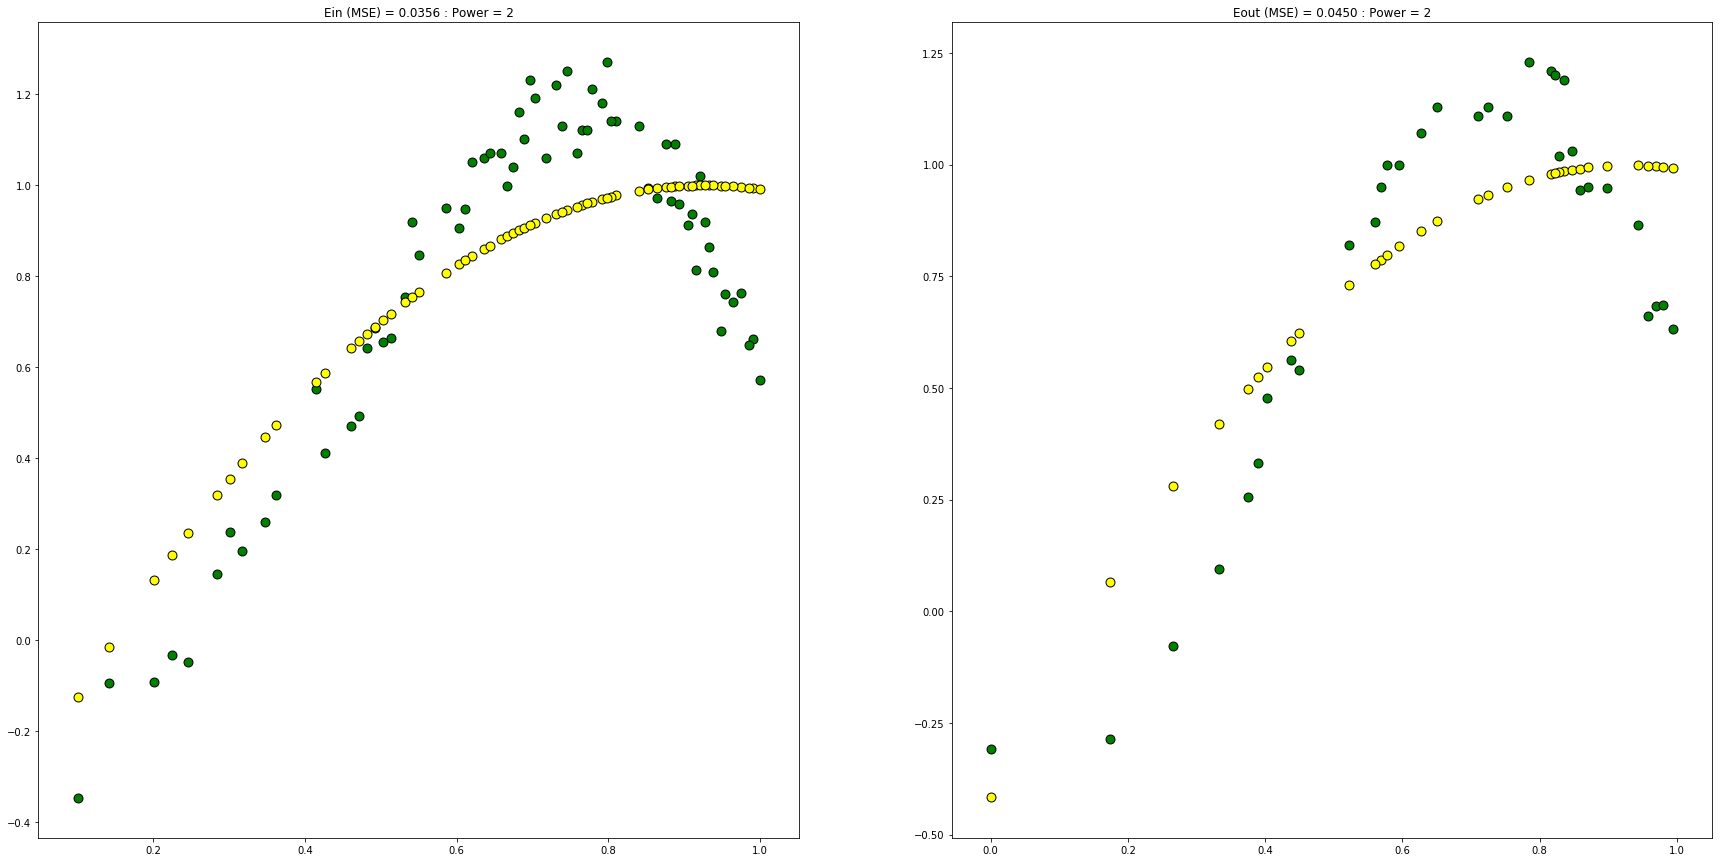

In [150]:
from sklearn.linear_model import RidgeCV

def calculate_error(X,y,lineg):
    yhat = lineg.predict(X)
    return (np.power(yhat - y,2).sum()/len(y))

def plot_circle_nd(X,y,linreg,title):
    _ = plt.scatter(X[:,0],y, marker='o',s=80,color='green', edgecolors='black')
    _ = plt.scatter(X[:,0],linreg.predict(X), marker='o',s=80,color='yellow', edgecolors='black')
    _ = plt.title(title)

def run_reg(X_in,y_in,power=1):
    X_train, X_test, y_train, y_test = train_test_split(X_in,y_in, test_size=0.33)
    linreg = RidgeCV()
    linreg.fit(X_train,y_train)

    plot_func = plot_circle_nd
    power = X_train.shape[1]
    
    f, axs = plt.subplots(1, 2, figsize=(30, 15))
    plt.subplot(1, 2, 1)
    train_error = calculate_error(X_train,y_train,linreg)
    plot_func(X_train,y_train,linreg,"Ein (MSE) = {:.4f} : Power = {}".format(train_error,power))
    plt.subplot(1, 2, 2)
    test_error  = calculate_error(X_test, y_test,linreg)
    plot_func(X_test,y_test,linreg,"Eout (MSE) = {:.4f} : Power = {}".format(test_error,power))
    plt.show()
    


X = np.c_[np.sqrt(data['X']),data['X']]
run_reg(X,data['y'])

## Alternative Approach
I have taken the x , Sqrt(x)  for RidgeCV. The Ein and Eout or worse than the liner regression.
